In [1]:
%cd "C:\CODE\BAIG"

C:\CODE\BAIG


In [235]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

In [178]:
df = pd.read_csv('train.csv')

# Variable	Definition
# id	Unique ID for the customer
# Gender	Gender of the customer
# Age	Age of the customer
# Driving_License	0 : Customer does not have DL, 1 : Customer already has DL
# Region_Code	Unique code for the region of the customer
# Previously_Insured	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
# Vehicle_Age	Age of the Vehicle
# Vehicle_Damage	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
# Annual_Premium	The amount customer needs to pay as premium in the year
# PolicySalesChannel	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
# Vintage	Number of Days, Customer has been associated with the company
# Response	1 : Customer is interested, 0 : Customer is not interested



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [78]:
#Null check
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Age_trans               0
Annual_Premium_trans    0
Vintage_trans           0
Vehicle_Age_trans       0
Top_Region              0
Sales_Channel           0
dtype: int64

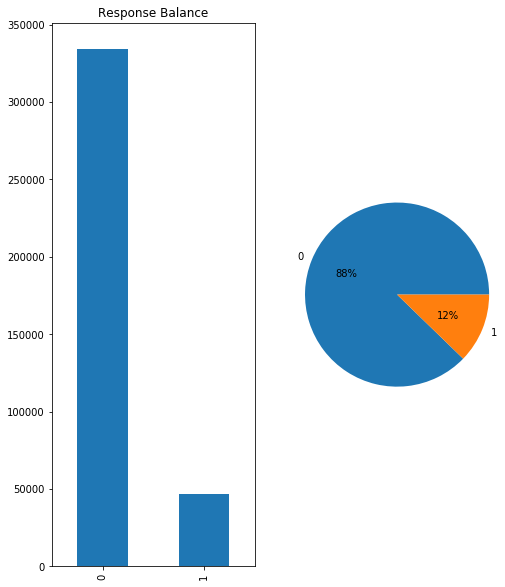

In [193]:
# Data Balance
df_1 = df[df['Response'] == 1]
df_0 = df[df['Response'] == 0]

plt.subplot(1, 2, 1)
ax = df['Response'].value_counts().plot(
                                        kind = 'bar',
                                        figsize = (8,10),
                                        title = 'Response Balance',)
plt.subplot(1, 2, 2)
balance = df[['Response']].groupby('Response').size()
labels_r = df['Response'].unique()
balance.index

plt.pie(balance, labels = balance.index, autopct='%1.0f%%', labeldistance=1.1)
plt.axis('equal')
plt.show()

plt.show()

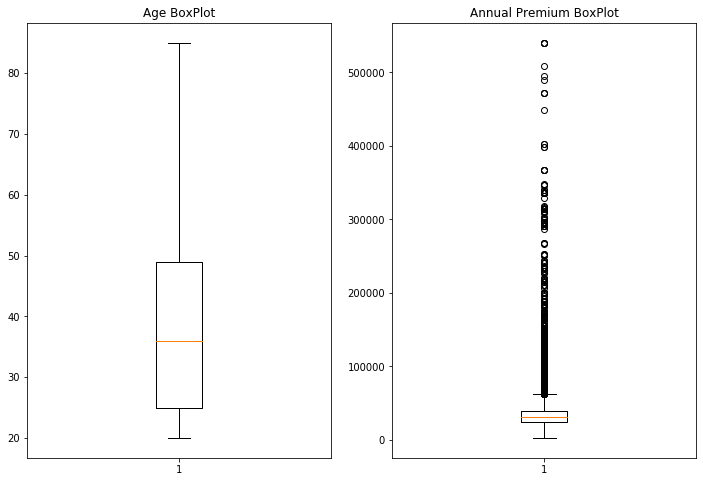

In [89]:
#Age, Annual Premium box plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.boxplot(df['Age'])
ax1.title.set_text('Age BoxPlot')
ax2.boxplot(df['Annual_Premium'])
ax2.title.set_text('Annual Premium BoxPlot')
plt.show()

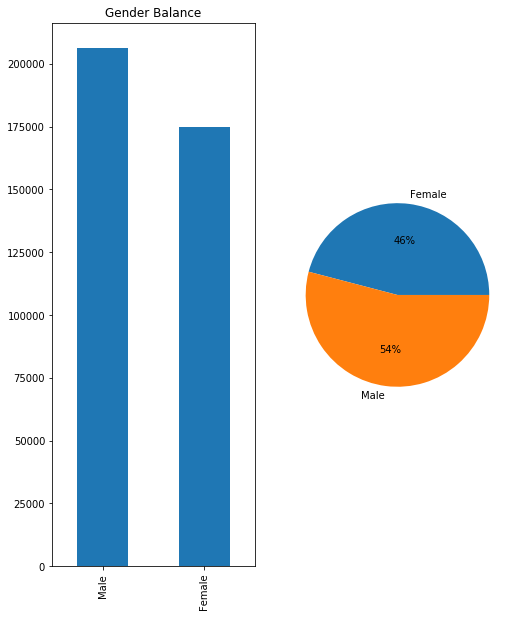

In [175]:
#Gender Balance

df_fem = df[df['Gender'] == 'Female']
df_mal = df[df['Gender'] == 'Male']

plt.subplot(1, 2, 1)
ax = df['Gender'].value_counts().plot(
                                        kind = 'bar',
                                        figsize = (8,10),
                                        title = 'Gender Balance',)                    
plt.subplot(1, 2, 2)
balance = df[['Gender']].groupby('Gender').size()
labels_r = df['Gender'].unique()
balance.index

plt.pie(balance, labels = balance.index, autopct='%1.0f%%', labeldistance=1.1)
plt.axis('equal')
plt.show()

plt.show()

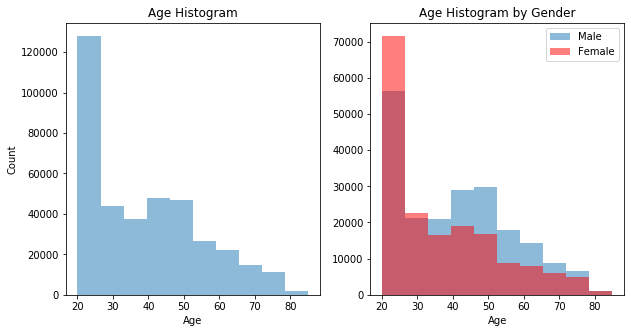

In [144]:
#Pasiskirstymas pgal lyti ir amziu
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.hist(df['Age'], alpha = 0.5, label = 'black')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.title.set_text('Age Histogram')

ax2.hist(df.loc[df['Gender'] == 'Male', 'Age'], alpha = 0.5, label = 'Male') 
ax2.hist(df.loc[df['Gender'] == 'Female', 'Age'], alpha = 0.5, color = 'red', label = 'Female')
ax2.title.set_text('Age Histogram by Gender')
ax2.set_xlabel('Age')
ax2.legend(loc = 'best')
# plt.xlabel('Amžius')
# plt.ylabel('Kiekis')
# plt.legend(loc = 'best')
plt.show()

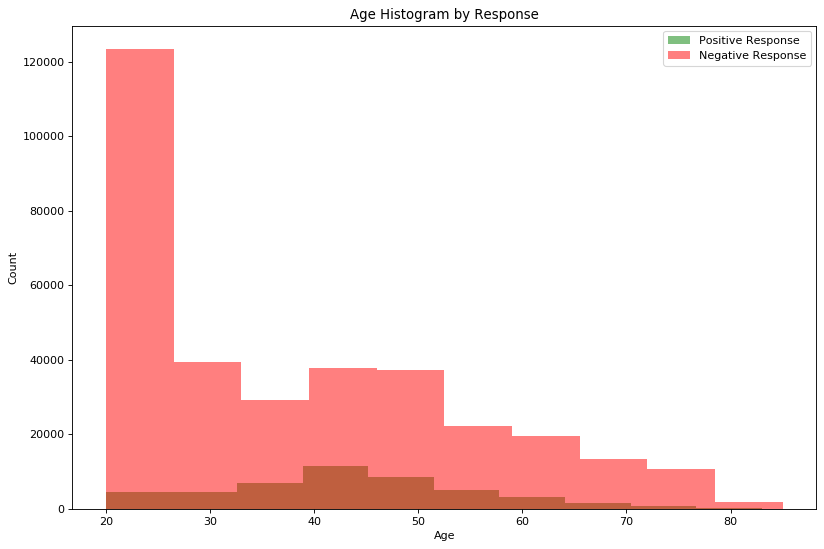

In [222]:
# Age histogram by Response
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.hist(df.loc[df['Response'] == 1, 'Age'], alpha = 0.5, color = 'Green', label = 'Positive Response') 
plt.hist(df.loc[df['Response'] == 0, 'Age'], alpha = 0.5, color = 'Red', label = 'Negative Response')
plt.title('Age Histogram by Response')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc = 'best')
plt.show()

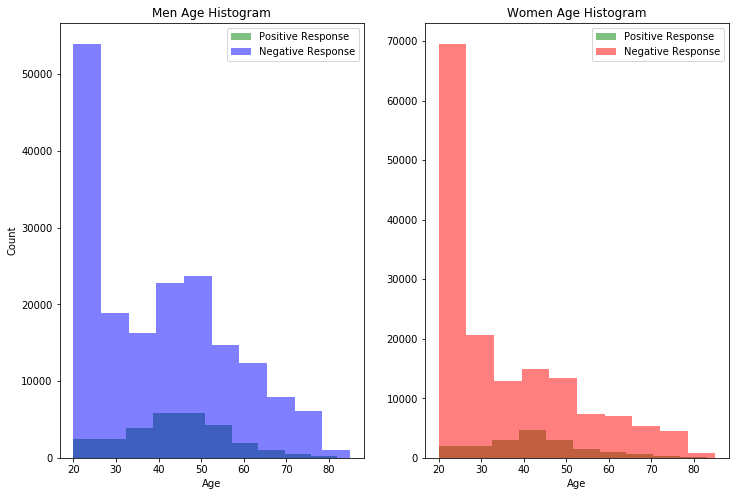

In [223]:
# Age histogram by Gender Response
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.hist(df_1.loc[df_1['Gender'] == 'Male', 'Age'], alpha = 0.5, color = 'green', label = 'Positive Response')
ax1.hist(df_0.loc[df_0['Gender'] == 'Male', 'Age'], alpha = 0.5, color = 'blue', label = 'Negative Response')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.title.set_text('Men Age Histogram')
ax1.legend(loc = 'best')

ax2.hist(df_1.loc[df_1['Gender'] == 'Female', 'Age'], alpha = 0.5, color = 'green', label = 'Positive Response') 
ax2.hist(df_0.loc[df_0['Gender'] == 'Female', 'Age'], alpha = 0.5, color = 'red', label = 'Negative Response') 
ax2.title.set_text('Women Age Histogram')
ax2.set_xlabel('Age')
ax2.legend(loc = 'best')
# plt.xlabel('Amžius')
# plt.ylabel('Kiekis')
# plt.legend(loc = 'best')
plt.show()

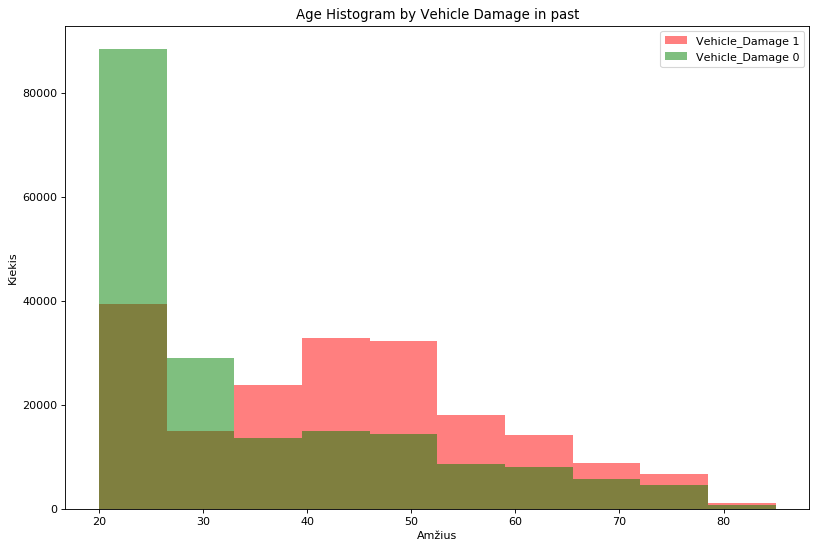

In [224]:
# pasiskirstymas automobiliu zalos ir amziu
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.hist(df.loc[df['Vehicle_Damage'] == 'Yes', 'Age'], alpha = 0.5, color = 'red', label = 'Vehicle_Damage 1') 
plt.hist(df.loc[df['Vehicle_Damage'] == 'No', 'Age'], alpha = 0.5, color = 'green', label = 'Vehicle_Damage 0')
plt.title('Age Histogram by Vehicle Damage in past')
plt.xlabel('Amžius')
plt.ylabel('Kiekis')
plt.legend(loc = 'best')
plt.show()

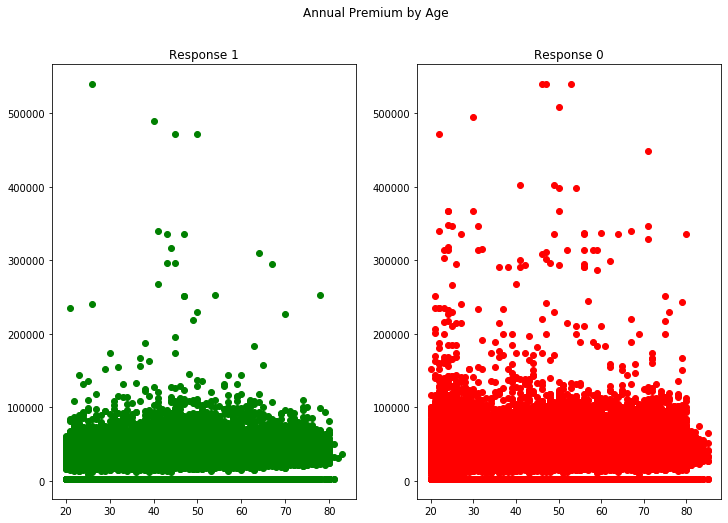

In [225]:
#Annual Premium by Age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Annual Premium by Age')
ax1.scatter(df_1['Age'], df_1['Annual_Premium'], color = 'green')
ax1.title.set_text('Response 1')
ax2.scatter(df_0['Age'], df_0['Annual_Premium'], color = 'red')
ax2.title.set_text('Response 0')
plt.show()

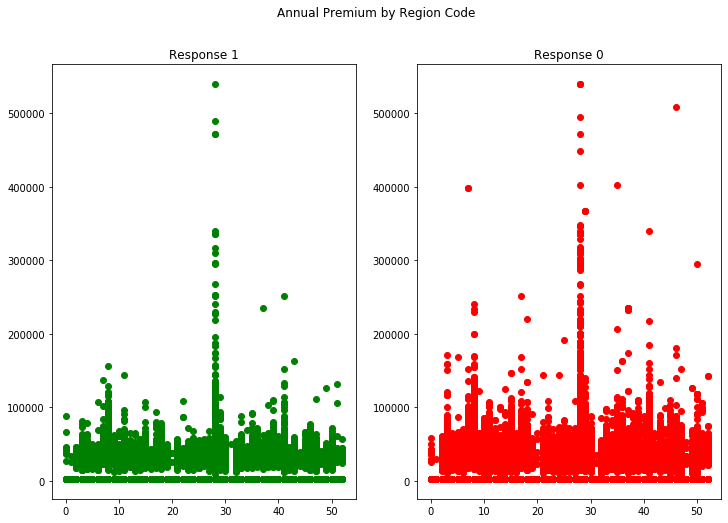

In [226]:
#Annual Premium by Region Code
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Annual Premium by Region Code')
ax1.scatter(df_1['Region_Code'], df_1['Annual_Premium'], color = 'green')
ax1.title.set_text('Response 1')
ax2.scatter(df_0['Region_Code'], df_0['Annual_Premium'], color = 'red')
ax2.title.set_text('Response 0')
plt.show()

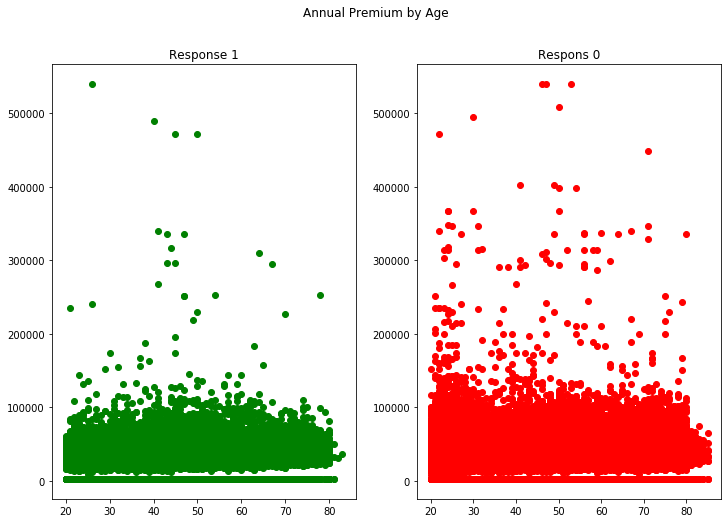

In [227]:
#Annual Premium by Age

fig.suptitle('Annual Premium by Age')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Annual Premium by Age')
ax1.title.set_text('Response 1')
ax1.scatter(df_1['Age'], df_1['Annual_Premium'], color = 'green')
ax2.title.set_text('Respons 0')
ax2.scatter(df_0['Age'], df_0['Annual_Premium'], color = 'red')

plt.show()

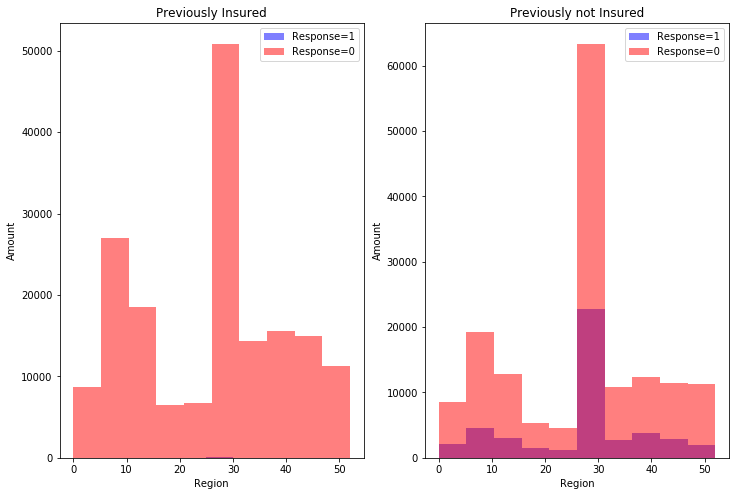

Previously_Insured  Response
0                   0           159929
                    1            46552
1                   0           174470
                    1              158
dtype: int64


In [228]:
#Region Code and Previously Insured correlation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.hist(df_1.loc[df_1['Previously_Insured'] == 1, 'Region_Code'], alpha = 0.5, color = 'blue', label = 'Response=1')
ax1.hist(df_0.loc[df_0['Previously_Insured'] == 1, 'Region_Code'], alpha = 0.5, color = 'red', label = 'Response=0')
ax1.set_xlabel('Region')
ax1.set_ylabel('Amount')
ax1.title.set_text('Previously Insured')
ax1.legend(loc = 'best')


ax2.hist(df_1.loc[df_1['Previously_Insured'] == 0, 'Region_Code'], alpha = 0.5, color = 'blue', label = 'Response=1')
ax2.hist(df_0.loc[df_0['Previously_Insured'] == 0, 'Region_Code'], alpha = 0.5, color = 'red', label = 'Response=0')
ax2.set_xlabel('Region')
ax2.set_ylabel('Amount')
ax2.title.set_text('Previously not Insured')
ax2.legend(loc = 'best')
plt.show()

grouped = df[['id', 'Previously_Insured', 'Response']].groupby(['Previously_Insured', 'Response']).size()
print(grouped)

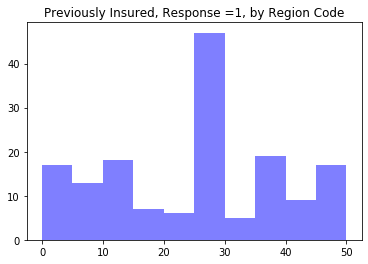

In [219]:
plt.hist(df_1.loc[df_1['Previously_Insured'] == 1, 'Region_Code'], alpha = 0.5, color = 'blue', label = 'Response=1')
plt.title('Previously Insured, Response =1, by Region Code')
plt.show()

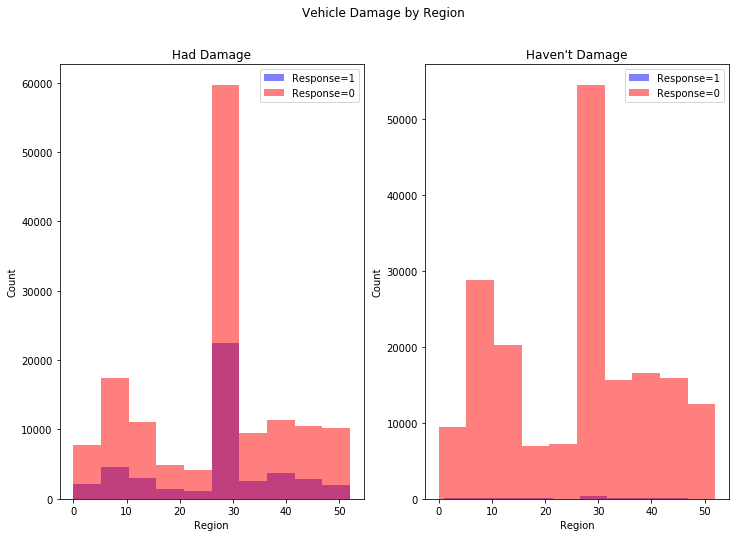

In [229]:
#Region and Damage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Vehicle Damage by Region')
ax1.hist(df_1.loc[df_1['Vehicle_Damage'] == 'Yes', 'Region_Code'], alpha = 0.5, color = 'blue', label = 'Response=1')
ax1.hist(df_0.loc[df_0['Vehicle_Damage'] == 'Yes', 'Region_Code'], alpha = 0.5, color = 'red', label = 'Response=0')
ax1.set_xlabel('Region')
ax1.set_ylabel('Count')
ax1.title.set_text('Had Damage')
ax1.legend(loc = 'best')

ax2.hist(df_1.loc[df_1['Vehicle_Damage'] == 'No', 'Region_Code'], alpha = 0.5, color = 'blue', label = 'Response=1')
ax2.hist(df_0.loc[df_0['Vehicle_Damage'] == 'No', 'Region_Code'], alpha = 0.5, color = 'red', label = 'Response=0')
ax2.set_xlabel('Region')
ax2.set_ylabel('Count')
ax2.title.set_text("Haven't Damage")
ax2.legend(loc = 'best')
plt.show()

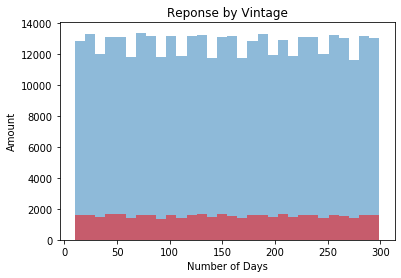

In [168]:
#Reponse by Vintage
plt.hist(df['Vintage'], alpha = 0.5, label = 'black', bins = 30)
plt.hist(df.loc[df['Response'] == 1, 'Vintage'], alpha = 0.5, label = 'Response 1', color = 'red', bins = 30) 
plt.xlabel('Number of Days')
plt.ylabel('Amount')
plt.title('Reponse by Vintage')

plt.show()

In [6]:
#Columns transform to numerical data
def df_for_model_trans(df):
    
    scal = StandardScaler()
    age_trans = scal.fit_transform(df[['Age']])
    Annual_Premium_trans = scal.fit_transform(df[['Annual_Premium']])
    Vintage_trans = scal.fit_transform(df[['Vintage']])
    Annual_Premium_trans = scal.fit_transform(df[['Annual_Premium']])
    
    df['Age_trans'] = age_trans
    df['Annual_Premium_trans'] = Annual_Premium_trans
    df['Vintage_trans'] = Vintage_trans
    
    df.Vehicle_Age.replace('1-2 Year', 1, inplace = True)
    df.Vehicle_Age.replace('> 2 Years', 2, inplace = True)
    df.Vehicle_Age.replace('< 1 Year', 0, inplace = True)
    Vehicle_Age_trans = scal.fit_transform(df[['Vehicle_Age']])
    df['Vehicle_Age_trans'] = Vehicle_Age_trans    
    
    grouped_r = df[['id','Region_Code']].groupby('Region_Code').size().reset_index()
    top_regions = grouped_r.sort_values(0, ascending = False).head(3)
    top_regions_list = top_regions['Region_Code'].tolist()
    df['Top_Region'] = df['Region_Code'].apply(lambda x: x if x in top_regions_list else 'Other')
    
    grouped = df[['id','Policy_Sales_Channel']].groupby('Policy_Sales_Channel').size().reset_index()
    top_channels = grouped.sort_values(0, ascending = False).head(3)
    top_channel_list = top_channels['Policy_Sales_Channel'].tolist()
    df['Sales_Channel'] = df['Policy_Sales_Channel'].apply(lambda x: x if x in top_channel_list else 'Other')
    
    df['Gender'].replace('Male', 0, inplace = True)
    df['Gender'].replace('Female', 1, inplace = True)

    
    df['Top_Region'] = df['Top_Region'].astype(str) #Regiono kodo stulpelio duomenys buvo float tipo, pakeiciu i str, kad veiktu dummies funkcija
    df['Sales_Channel'] = df['Sales_Channel'].astype(str)
    df_dummy = pd.get_dummies(df[['Vehicle_Damage', 'Top_Region', 'Sales_Channel']])
    df_full = pd.concat([df, df_dummy], axis = 1)
    df_full.drop(['id', 'Region_Code', 'Vehicle_Damage', 'Policy_Sales_Channel', 
                  'Top_Region', 'Sales_Channel', 'Age', 'Annual_Premium', 'Vintage', 'Vehicle_Age'], axis = 1, inplace = True)
    return df_full

In [7]:
#Dataframe columns transform
df_full = df_for_model_trans(df)



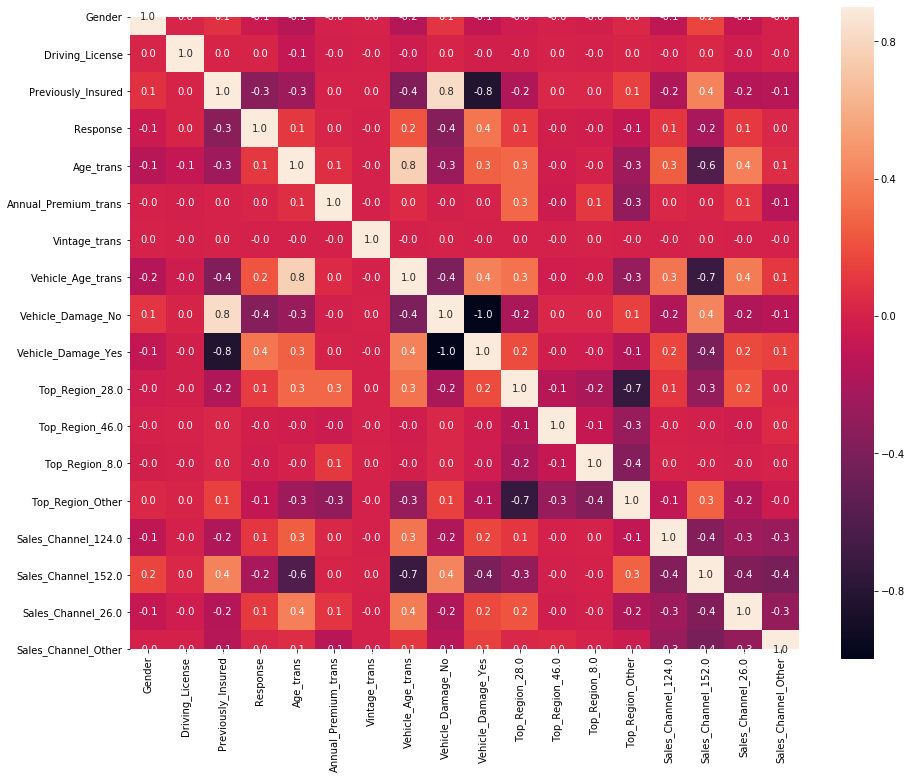

In [212]:
Corr = df_full.corr(method="pearson")
matplotlib.pyplot.figure(figsize=(15,12))
sns.heatmap(Corr, vmax=.9, square=True, annot=True, fmt='.1f')

In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 18 columns):
Gender                  381109 non-null int64
Driving_License         381109 non-null int64
Previously_Insured      381109 non-null int64
Response                381109 non-null int64
Age_trans               381109 non-null float64
Annual_Premium_trans    381109 non-null float64
Vintage_trans           381109 non-null float64
Vehicle_Age_trans       381109 non-null float64
Vehicle_Damage_No       381109 non-null uint8
Vehicle_Damage_Yes      381109 non-null uint8
Top_Region_28.0         381109 non-null uint8
Top_Region_46.0         381109 non-null uint8
Top_Region_8.0          381109 non-null uint8
Top_Region_Other        381109 non-null uint8
Sales_Channel_124.0     381109 non-null uint8
Sales_Channel_152.0     381109 non-null uint8
Sales_Channel_26.0      381109 non-null uint8
Sales_Channel_Other     381109 non-null uint8
dtypes: float64(4), int64(4), uint8(10)
memory usage:

In [9]:
#Training and test data split
features = list(df_full.loc[:,df_full.columns != 'Response'].columns)
target = 'Response'


X = df_full[features]
y = df_full[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, train_size = 0.75)

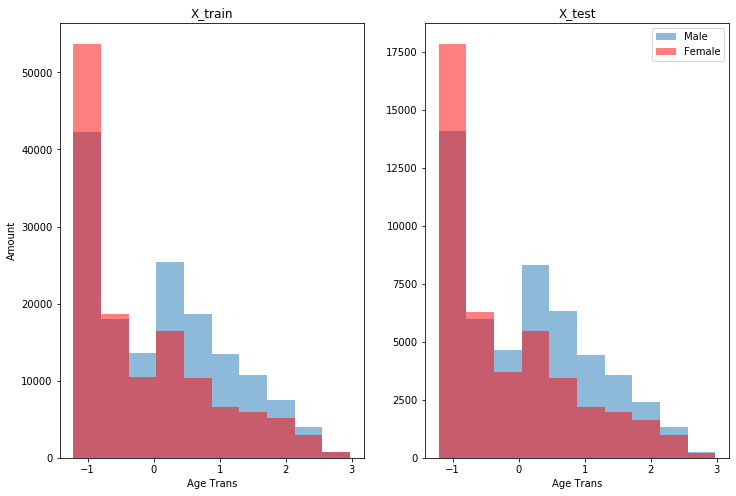

In [230]:
# X_train and X_test data distrubution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.hist(X_train.loc[X_train['Gender'] == 0, 'Age_trans'], alpha = 0.5, label = 'Male') 
ax1.hist(X_train.loc[X_train['Gender'] == 1, 'Age_trans'], alpha = 0.5, color = 'red', label = 'Female')
ax1.set_xlabel('Age Trans')
ax1.set_ylabel('Amount')
ax1.title.set_text('X_train')

ax2.hist(X_test.loc[X_test['Gender'] == 0, 'Age_trans'], alpha = 0.5, label = 'Male') 
ax2.hist(X_test.loc[X_test['Gender'] == 1, 'Age_trans'], alpha = 0.5, color = 'red', label = 'Female')
ax2.title.set_text('X_test')
ax2.set_xlabel('Age Trans')
ax2.legend(loc = 'best')
plt.show()

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285831 entries, 224742 to 297827
Data columns (total 17 columns):
Gender                  285831 non-null int64
Driving_License         285831 non-null int64
Previously_Insured      285831 non-null int64
Age_trans               285831 non-null float64
Annual_Premium_trans    285831 non-null float64
Vintage_trans           285831 non-null float64
Vehicle_Age_trans       285831 non-null float64
Vehicle_Damage_No       285831 non-null uint8
Vehicle_Damage_Yes      285831 non-null uint8
Top_Region_28.0         285831 non-null uint8
Top_Region_46.0         285831 non-null uint8
Top_Region_8.0          285831 non-null uint8
Top_Region_Other        285831 non-null uint8
Sales_Channel_124.0     285831 non-null uint8
Sales_Channel_152.0     285831 non-null uint8
Sales_Channel_26.0      285831 non-null uint8
Sales_Channel_Other     285831 non-null uint8
dtypes: float64(4), int64(3), uint8(10)
memory usage: 20.2 MB


In [11]:
# Class balance in test group
print("TEST GROUP")
print('Size:',y_test.count())
print("Negative response percentage:",
      y_test.value_counts()[1]/y_test.count())
print("Positive response percentage:",
      y_test.value_counts()[0]/y_test.count())

# Class balance in train group
print("\nTRAIN GROUP")
print('Size:',y_train.count())
print("Negative response percentage:",
      y_train.value_counts()[1]/y_train.count())
print("Positive response percentage:",
      y_train.value_counts()[0]/y_train.count())



TEST GROUP
Size: 95278
Negative response percentage: 0.12176997837905917
Positive response percentage: 0.8782300216209408

TRAIN GROUP
Size: 285831
Negative response percentage: 0.12282782483355549
Positive response percentage: 0.8771721751664445


Modelio tikslumas:0.8781355611998573


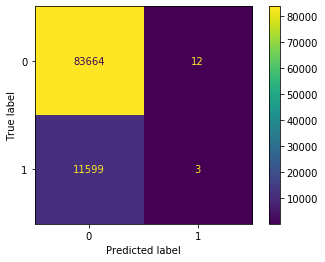

In [158]:
# Logistic regression
model_LR = LogisticRegression(max_iter = 500)

model_LR.fit(X_train, y_train)
print(f'Modelio tikslumas:{model_LR.score(X_test, y_test)}')
plot_confusion_matrix(model_LR, X_test, y_test)
plt.show()

Modelio tikslumas:0.8777682151178656


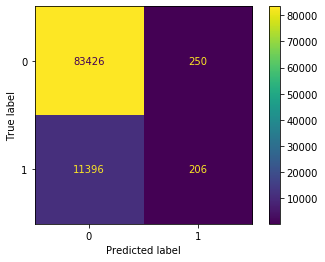

In [13]:
# XGB Vlassifier modelis
model_X = XGBClassifier()

model_X.fit(X_train, y_train)
print(f'Modelio tikslumas:{model_X.score(X_test, y_test)}')
plot_confusion_matrix(model_X, X_test, y_test)

Modelio tikslumas: 0.8244715464220491


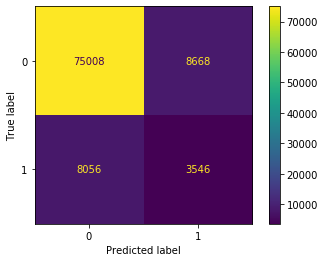

In [14]:
#DecisionTreeClassifier model

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
print(f'Modelio tikslumas: {model_tree.score(X_test, y_test)}')

plot_confusion_matrix(model_tree, X_test, y_test)
plt.show()

Modelio tikslumas: 0.8578475618715758


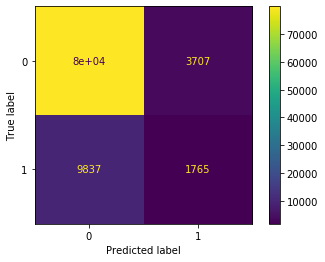

In [15]:
#random forrest model
model_fore = RandomForestClassifier(n_jobs = -1)
model_fore.fit(X_train, y_train)

print(f'Modelio tikslumas: {model_fore.score(X_test, y_test)}')
plot_confusion_matrix(model_fore, X_test, y_test)

Modelio tikslumas: 0.7024496735867671


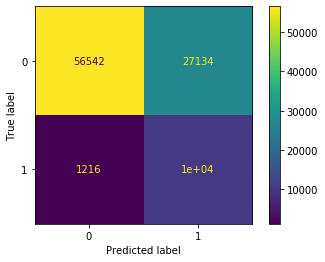

In [16]:
model_BRF = BalancedRandomForestClassifier(n_jobs = -1)
model_BRF.fit(X_train, y_train)

print(f'Modelio tikslumas: {model_BRF.score(X_test, y_test)}')
plot_confusion_matrix(model_BRF, X_test, y_test)

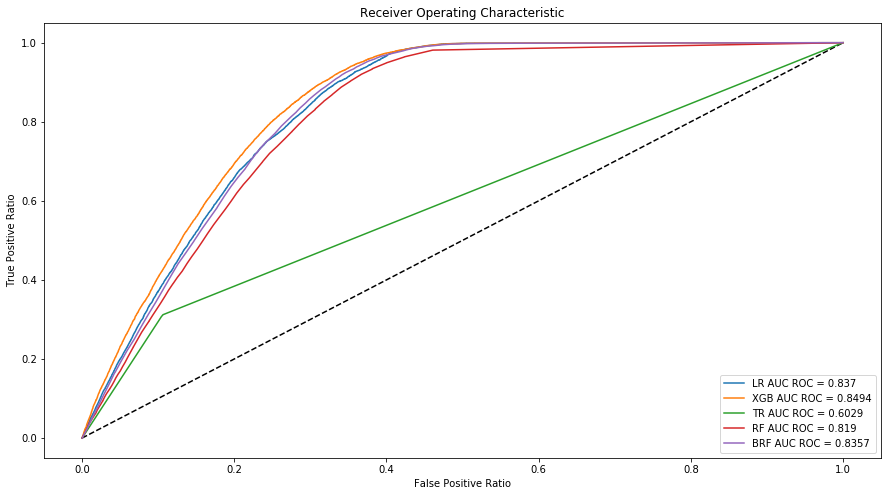

In [161]:
#ROC Curve

plt.figure(0, figsize =(15, 8)).clf()
y_pred_prob1 = model_LR.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = model_X.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = model_tree.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = model_fore.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = metrics.roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = model_BRF.predict_proba(X_test)[:,1]
fpr5 , tpr5, thresholds5 = metrics.roc_curve(y_test, y_pred_prob5)

LR_roc_auc = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1])
XGB_roc_auc = roc_auc_score(y_test, model_X.predict_proba(X_test)[:,1])
TR_roc_auc = roc_auc_score(y_test, model_tree.predict_proba(X_test)[:,1])
RF_roc_auc = roc_auc_score(y_test, model_fore.predict_proba(X_test)[:,1])
BRF_roc_auc = roc_auc_score(y_test, model_BRF.predict_proba(X_test)[:,1])

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= f"LR AUC ROC = {round(LR_roc_auc, 4)}")
plt.plot(fpr2, tpr2, label= f"XGB AUC ROC = {round(XGB_roc_auc, 4)}")
plt.plot(fpr3, tpr3, label= f"TR AUC ROC = {round(TR_roc_auc, 4)}")
plt.plot(fpr4, tpr4, label= f"RF AUC ROC = {round(RF_roc_auc, 4)}")
plt.plot(fpr5, tpr5, label= f"BRF AUC ROC = {round(BRF_roc_auc, 4)}")
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title('Receiver Operating Characteristic')
plt.show()

LR_roc_auc = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1])
XGB_roc_auc = roc_auc_score(y_test, model_X.predict_proba(X_test)[:,1])
TR_roc_auc = roc_auc_score(y_test, model_tree.predict_proba(X_test)[:,1])
RF_roc_auc = roc_auc_score(y_test, model_fore.predict_proba(X_test)[:,1])
BRF_roc_auc = roc_auc_score(y_test, model_BRF.predict_proba(X_test)[:,1])



In [21]:
print(f'LogisticRegression ROC AUC score: {LR_roc_auc}',
     f'\nXGBoost Classiefier ROC AUC score: {XGB_roc_auc}',
     f'\nDecisionTreeClassifier ROC AUC score: {TR_roc_auc}',
     f'\nRandomForste Classifier ROC AUC score: {RF_roc_auc}',
     f'\nBalancedRandomForestClassifier ROC AUC score: {BRF_roc_auc}')

LogisticRegression ROC AUC score: 0.8369565328235664 
XGBoost Classiefier ROC AUC score: 0.8493728197512542 
DecisionTreeClassifier ROC AUC score: 0.6028989553446145 
RandomForste Classifier ROC AUC score: 0.8190100980857046 
BalancedRandomForestClassifier ROC AUC score: 0.83573290896065


Best: 0.850507 using {'scale_pos_weight': 1}
0.850507 (0.001755) with: {'scale_pos_weight': 1}
0.848802 (0.001888) with: {'scale_pos_weight': 10}
0.847909 (0.002071) with: {'scale_pos_weight': 25}
0.847348 (0.001760) with: {'scale_pos_weight': 50}
0.846774 (0.001814) with: {'scale_pos_weight': 75}
0.846904 (0.001803) with: {'scale_pos_weight': 99}
0.846762 (0.002113) with: {'scale_pos_weight': 100}
0.846325 (0.002135) with: {'scale_pos_weight': 1000}


In [22]:
# #XGBoost imbalanced data
# Control the balance of positive and negative weights, useful for unbalanced classes.
# A typical value to consider: sum(negative instances) / sum(positive instances)

ratio = y_train.value_counts()[0]/y_train.value_counts()[1]
ratio

7.212204792277194

Modelio tikslumas:0.7065849409097588


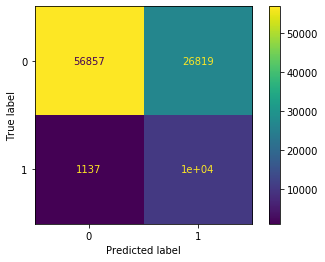

In [23]:
model_XW = XGBClassifier(scale_pos_weight = ratio, n_jobs = -1)

model_XW.fit(X_train, y_train)
print(f'Modelio tikslumas:{model_XW.score(X_test, y_test)}')
plot_confusion_matrix(model_XW, X_test, y_test)

In [204]:
#XGBooster Classiefier hyperparameters tuning
xgb_params = {
        'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
        'scale_pos_weight': [ratio],
        'max_depth' : [ 3, 4, 5, 6, 8, 12],
        "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
        "min_child_weight" : [ 1, 3, 5 ]

        }


In [205]:
model_XGBTuned = XGBClassifier()
# define grid search
grid_1 = GridSearchCV(model_XGBTuned, param_grid=xgb_params, n_jobs=-1, cv=2, scoring='roc_auc')
grid_1.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [207]:
# report the best configuration
print("Best: %f using %s" % (grid_1.best_score_, grid_1.best_params_))
# report all configurations
means = grid_1.cv_results_['mean_test_score']
stds = grid_1.cv_results_['std_test_score']
params = grid_1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.853010 using {'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 3, 'scale_pos_weight': 7.212204792277194}
0.849452 (0.001004) with: {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'scale_pos_weight': 7.212204792277194}
0.849454 (0.001006) with: {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'scale_pos_weight': 7.212204792277194}
0.849454 (0.001006) with: {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'scale_pos_weight': 7.212204792277194}
0.852072 (0.000735) with: {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'scale_pos_weight': 7.212204792277194}
0.852067 (0.000841) with: {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3, 'scale_pos_weight': 7.212204792277194}
0.852084 (0.000820) with: {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 5, 'scale_pos_weight': 7.212204792277194}
0.852888 (0

Modelio tikslumas:0.6949977959235081


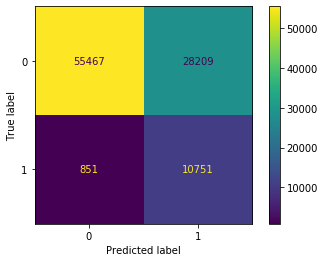

In [24]:
model_XGBTuned_F7 = XGBClassifier(scale_pos_weight = ratio, n_jobs = -1, gamma= 0.2, learning_rate= 0.05, max_depth= 6, 
                                 min_child_weight= 3)

model_XGBTuned_F7.fit(X_train, y_train)
print(f'Modelio tikslumas:{model_XGBTuned_F7.score(X_test, y_test)}')
plot_confusion_matrix(model_XGBTuned_F7, X_test, y_test)

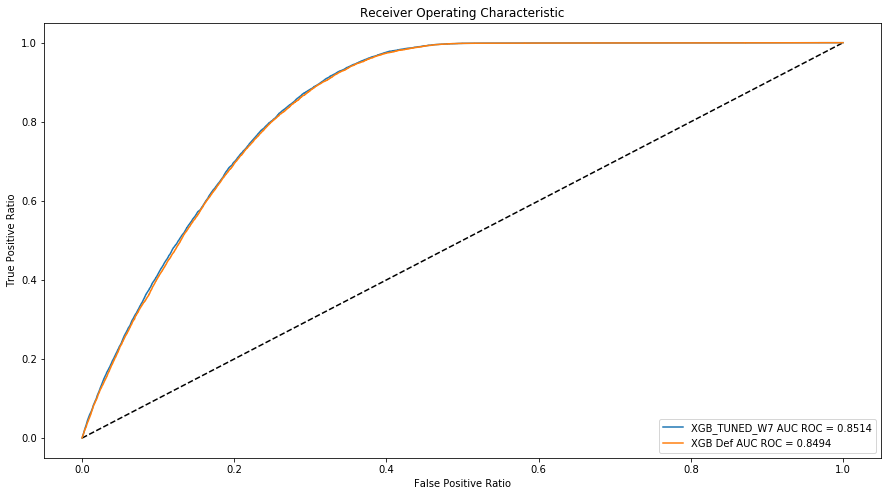

In [233]:
#ROC Curve

plt.figure(0, figsize =(15, 8)).clf()
y_pred_prob1 = model_XGBTuned_F7.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred_prob1)


y_pred_prob2 = model_X.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(y_test, y_pred_prob2)

XGB_W7 = roc_auc_score(y_test, model_XGBTuned_F7.predict_proba(X_test)[:,1])

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= f"XGB_TUNED_W7 AUC ROC = {round(XGB_W7, 4)}")
plt.plot(fpr2, tpr2, label= f"XGB Def AUC ROC = {round(XGB_roc_auc, 4)}")

plt.legend(loc = 'lower right')
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title('Receiver Operating Characteristic')
plt.show()



In [29]:
print(f'XGBoost Classiefier tuned weigt 7 ROC AUC score: {XGB_W7}',
     f'\nXGBoost Classiefier def ROC AUC score: {XGB_roc_auc}')
   

XGBoost Classiefier tuned weigt 7 ROC AUC score: 0.8514139221699307 
XGBoost Classiefier def ROC AUC score: 0.8493728197512542


Text(0.5, 1.0, 'XGB Def Precision-Recall curve: ')

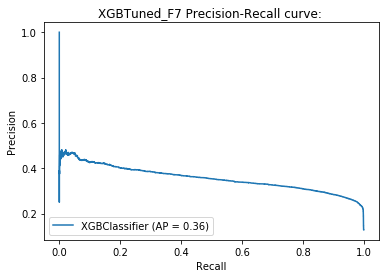

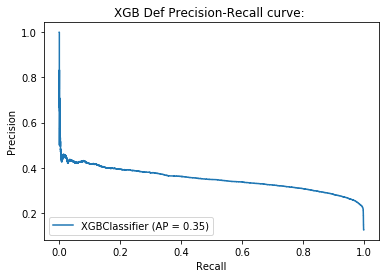

In [240]:
#Plot Precision Recall curve

disp = plot_precision_recall_curve(model_XGBTuned_F7, X_test, y_test)
disp.ax_.set_title('XGBTuned_F7 Precision-Recall curve: '
                   )


disp = plot_precision_recall_curve(model_X, X_test, y_test)
disp.ax_.set_title('XGB Def Precision-Recall curve: '
                   )

In [137]:
#Treshold editing

treshold_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
scores_list = []
suma = 0

for j in treshold_list:
    y_proba = model_XGBTuned_F7.predict_proba(X_test)

    y_proba.tolist()

    y_predicted = model_XGBTuned_F7.predict(X_test)
    y_pred = [1 if i[1] > j else 0 for i in y_proba]
    y_pred_arr = np.array(y_pred)
    y_true_arr = y_test.array

    df_cm = pd.DataFrame({'y_true': y_true_arr, 'y_pred' : y_pred_arr}, index = y_true_arr)
    confusion_matrix = pd.crosstab(df_cm['y_true'], df_cm['y_pred'], rownames=['Actual'], colnames=['Predicted'])
    tot = (confusion_matrix.sum()[1] + confusion_matrix.sum()[0])
    true =(confusion_matrix.iloc[[0], [0]].sum()[0]) + (confusion_matrix.iloc[[1], [1]].sum()[1])
    score = true/tot
    print(f'Treshold: {j}, Accuracy:{score}')
    

Treshold: 0.1, Accuracy:0.5807846512311342
Treshold: 0.2, Accuracy:0.6095530972522513
Treshold: 0.3, Accuracy:0.6417116228300342
Treshold: 0.4, Accuracy:0.6587040030227335
Treshold: 0.5, Accuracy:0.6949977959235081
Treshold: 0.6, Accuracy:0.7353533869308759
Treshold: 0.7, Accuracy:0.7786582421965197


In [138]:
y_proba = model_XGBTuned_F7.predict_proba(X_test)

y_proba.tolist()

y_predicted = model_XGBTuned_F7.predict(X_test)
y_pred = [1 if i[1] > 0.7 else 0 for i in y_proba]
y_pred_arr = np.array(y_pred)
y_true_arr = y_test.array

df_cm = pd.DataFrame({'y_true': y_true_arr, 'y_pred' : y_pred_arr}, index = y_true_arr)


confusion_matrix = pd.crosstab(df_cm['y_true'], df_cm['y_pred'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)



Predicted      0      1
Actual                 
0          65704  17972
1           3117   8485
